Frame Counts:
{'Night': 370, 'Day': 276}

Percentages:
Night: 57.28%
Day: 42.72%


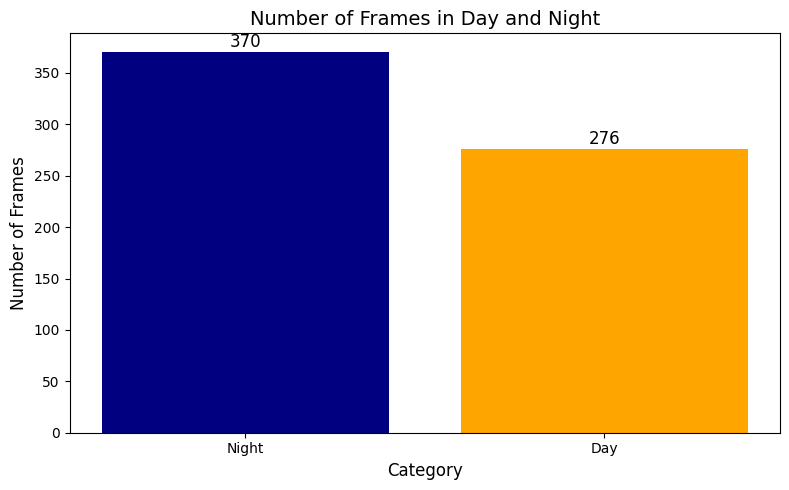

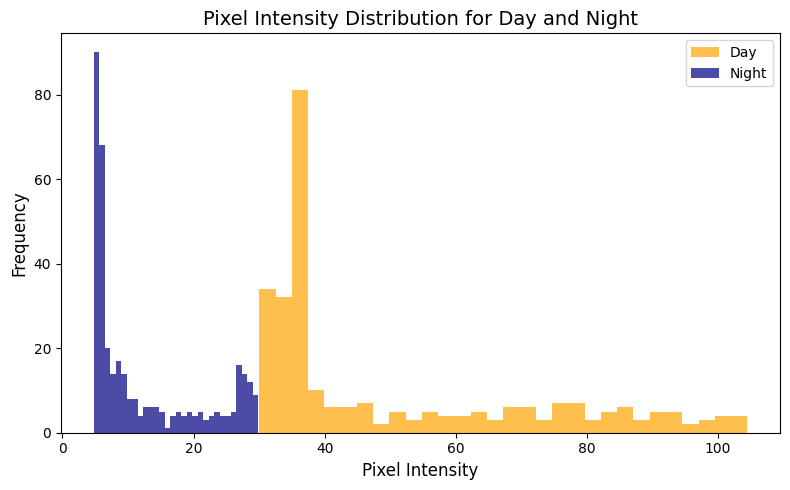

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate Pixel Intensity Distribution
def calculate_pixel_intensity_distribution(video_path):
    """
    Extracts and computes the pixel intensity distribution for each frame in a video.

    Args:
        video_path (str): Path to the video file.

    Returns:
        list: A list of pixel intensity distributions for each frame.
    """
    intensity_distributions = []
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale to analyze pixel intensities
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Compute histogram of pixel intensities
        hist = cv2.calcHist([gray_frame], [0], None, [256], [0, 256]).flatten()
        intensity_distributions.append(hist)

    cap.release()
    return intensity_distributions

# 2. Classify Frames into Day and Night
def classify_day_night(intensity_distributions, night_threshold):
    """
    Classifies frames into Day and Night based on mean pixel intensity.

    Args:
        intensity_distributions (list): List of pixel intensity histograms for each frame.
        night_threshold (int): Maximum pixel intensity threshold for Night frames.

    Returns:
        dict: Counts of Day and Night frames and percentages.
        list: Classification of each frame as "Day" or "Night".
    """
    classifications = []
    total_frames = len(intensity_distributions)

    for hist in intensity_distributions:
        mean_intensity = np.sum(hist * np.arange(256)) / np.sum(hist)
        if mean_intensity < night_threshold:
            classifications.append("Night")
        else:
            classifications.append("Day")

    night_frames = classifications.count("Night")
    day_frames = classifications.count("Day")

    percentages = {
        "Night": (night_frames / total_frames) * 100,
        "Day": (day_frames / total_frames) * 100
    }

    return {
        "counts": {"Night": night_frames, "Day": day_frames},
        "percentages": percentages,
        "classifications": classifications
    }

# 3. Plot Frame Counts for Day and Night
def plot_frame_counts(frame_counts):
    """
    Plots the number of frames in Day and Night.

    Args:
        frame_counts (dict): Counts of frames for Day and Night.
    """
    labels = frame_counts.keys()
    values = frame_counts.values()

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=['navy', 'orange'])

    # Add value annotations on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', fontsize=12)

    plt.title("Number of Frames in Day and Night", fontsize=14)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Number of Frames", fontsize=12)
    plt.tight_layout()
    plt.show()

# 4. Plot Intensity Distribution for Day and Night
def plot_intensity_distribution(intensity_distributions, classifications):
    """
    Plots the intensity distribution for Day and Night frames.

    Args:
        intensity_distributions (list): List of pixel intensity histograms for each frame.
        classifications (list): Classification of each frame as "Day" or "Night".
    """
    day_intensities = []
    night_intensities = []

    for hist, classification in zip(intensity_distributions, classifications):
        mean_intensity = np.sum(hist * np.arange(256)) / np.sum(hist)
        if classification == "Day":
            day_intensities.append(mean_intensity)
        else:
            night_intensities.append(mean_intensity)

    plt.figure(figsize=(8, 5))
    plt.hist(day_intensities, bins=30, color='orange', alpha=0.7, label='Day')
    plt.hist(night_intensities, bins=30, color='navy', alpha=0.7, label='Night')

    plt.title("Pixel Intensity Distribution for Day and Night", fontsize=14)
    plt.xlabel("Pixel Intensity", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    video_path = "/content/Day to night transition timelapse _ 4K UHD.mp4"  # Replace with your video file path
    night_threshold = 30  # Adjust threshold value based on the video

    # Step 1: Calculate Pixel Intensity Distribution
    intensity_distributions = calculate_pixel_intensity_distribution(video_path)

    if intensity_distributions:
        # Step 2: Classify Frames into Day and Night
        stats = classify_day_night(intensity_distributions, night_threshold)

        # Print Statistics
        print("Frame Counts:")
        print(stats["counts"])
        print("\nPercentages:")
        print(f"Night: {stats['percentages']['Night']:.2f}%")
        print(f"Day: {stats['percentages']['Day']:.2f}%")

        # Step 3: Plot Frame Counts
        plot_frame_counts(stats["counts"])

        # Step 4: Plot Intensity Distribution
        plot_intensity_distribution(intensity_distributions, stats["classifications"])
